In [195]:
# Necessary libraries for analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import miceforest as mf
import warnings 
warnings.filterwarnings("ignore") 

from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


#### Data import

In [196]:
# Select site (minning unit)
# Ermitaño, La Encantada, San Dimas o Santa Elena
# Just San Dimas by the moment

site = str(input("Site"))+".xlsx"

# Import excel file
data = pd.read_excel(site,sheet_name="PRODUCTION")

In [197]:
data.columns

Index(['DATE', 'SITE', 'AU_AG_RATIO', 'THROUGHPUT_T', 'AG_HEAD_GRADE_GPT',
       'AG_RECOVERY_PCT', 'AU_HEAD_GRADE_GPT', 'AU_RECOVERY_PCT',
       'AU_RECOVERY_OZ', 'AG_RECOVERY_OZ', 'AG_RECOVERY_EQV_OZ',
       'BM_POWER_KWH', 'CR_POWER_KWH', 'POWER_KWH', 'SGE_BM1_KWHPT',
       'SGE_BM2_KWHPT', 'SGE_BM3_KWHPT', 'BM_OPERATION_TIME_H',
       'BM_THROUGHPUT_TPH', 'CR_OPERATION_TIME_H', 'CR_THROUGHPUT_TPH',
       'CR_THROUGHPUT_T', 'OPERATION_TIME_FILTERS_H', 'FILTERS_THROUGHPUT_TPH',
       'MC_PUMPING_M3', 'WASHING_RATIO_M3PT', 'AG_PLS_PPM', 'AU_PLS_PPM',
       'AG_BLS_PPM', 'AU_BLS_PPM', 'AG_MC_EFFICIENCY_PCT',
       'AU_MC_EFFICIENCY_PCT', 'AG_TAILINGS_GRADE_PPM',
       'AU_TAILINGS_GRADE_PPM', 'AG_TAILINGS_GRADE_GPT',
       'AU_TAILINGS_GRADE_GPT', 'TAILINGS_HUMIDITY_PCT', 'F80_BM_MM',
       'P80_BM_OF_MM', 'P80_FT_MM', 'P80_BM_OF_PCT', 'P80_FT_PCT',
       'CYANIDE_KGPT', 'CYANIDE_KGCNPKGAG', 'AGITATION_CYANIDE_PPM',
       'ZINC_DUST_KGZNPKGAG', 'LIME_KGPT', 'AGITATION_TIM

In [198]:
data = data[['DATE', 'SITE', 'AU_AG_RATIO', 'THROUGHPUT_T', 'AG_HEAD_GRADE_GPT',
       'AG_RECOVERY_PCT', 'AU_HEAD_GRADE_GPT', 'AU_RECOVERY_PCT',
       'AU_RECOVERY_OZ', 'AG_RECOVERY_OZ', 'AG_RECOVERY_EQV_OZ',
       'BM_POWER_KWH', 'CR_POWER_KWH', 'POWER_KWH', 'SGE_BM1_KWHPT',
       'SGE_BM2_KWHPT', 'SGE_BM3_KWHPT', 'BM_OPERATION_TIME_H',
       'BM_THROUGHPUT_TPH', 'CR_OPERATION_TIME_H', 'CR_THROUGHPUT_TPH',
       'CR_THROUGHPUT_T', 'OPERATION_TIME_FILTERS_H', 'FILTERS_THROUGHPUT_TPH',
       'MC_PUMPING_M3', 'WASHING_RATIO_M3PT', 'AG_PLS_PPM', 'AU_PLS_PPM',
       'AG_BLS_PPM', 'AU_BLS_PPM', 'AG_MC_EFFICIENCY_PCT',
       'AU_MC_EFFICIENCY_PCT', 'AG_TAILINGS_GRADE_PPM',
       'AU_TAILINGS_GRADE_PPM', 'AG_TAILINGS_GRADE_GPT',
       'AU_TAILINGS_GRADE_GPT', 'TAILINGS_HUMIDITY_PCT', 'F80_BM_MM',
       'P80_BM_OF_MM', 'P80_FT_MM','CYANIDE_KGPT', 'CYANIDE_KGCNPKGAG', 'AGITATION_CYANIDE_PPM',
       'ZINC_DUST_KGZNPKGAG', 'LIME_KGPT', 'AGITATION_TIME_H', 'AGITATION_PH',
       'FILTER_AID_KGPM3', 'FLOCCULANT_GPT', 'LEAD_NITRATE_KGPT',
       'ANTIFOULING_GPM3', 'SB_KGPT']]

#### New variables creation

In [199]:
# Create new variables (year, month, year by mont and year by q) using 'date' time variable.
# Date categorical variables.

data['YEAR'] = pd.DatetimeIndex(data['DATE']).year.astype(str)
data['QT'] = pd.DatetimeIndex(data['DATE']).quarter.astype(str)
data['MONTH'] = pd.DatetimeIndex(data['DATE']).month
data['YYYY_M'] = data.YEAR.astype(str).str.cat(data.MONTH.astype(str), sep='M')

# Operation variables.
# Disolution (response) variables

#if site != "La Encantada.xlsx":
data['AG_DISSOLUTION_PCT'] =  ((data['AG_HEAD_GRADE_GPT']-data['AG_TAILINGS_GRADE_GPT'])/data['AG_HEAD_GRADE_GPT'])*100

if site != "La Encantada.xlsx":
    data['AU_DISSOLUTION_PCT'] =  ((data['AU_HEAD_GRADE_GPT']-data['AU_TAILINGS_GRADE_GPT'])/data['AU_HEAD_GRADE_GPT'])*100

# Process calculated variables
data['WASHING_RATIO_M3PT'] =  data['MC_PUMPING_M3']/data['THROUGHPUT_T']
data['AG_FEED_CONTENT_KG'] = (data['AG_HEAD_GRADE_GPT']*data['THROUGHPUT_T'])/1000
if site != "La Encantada.xlsx":
    data['AU_FEED_CONTENT_KG'] = (data['AU_HEAD_GRADE_GPT']*data['THROUGHPUT_T'])/1000



#### Date Splits

In [200]:
# Splits by year 
d0 = data.copy() # Create a copy of original (data) dataset

#d19 = d0.groupby('YEAR').get_group("2019") # create a dataframe of 2022 (d19) exctracted from original dataset (data)
#d20 = d0.groupby('YEAR').get_group("2020") # create a dataframe of 2022 (d20) exctracted from original dataset (data)
#d21 = d0.groupby('YEAR').get_group("2021") # create a dataframe of 2022 (d21) exctracted from original dataset (data)
d22 = d0.groupby('YEAR').get_group("2022") # create a dataframe of 2022 (d22) exctracted from original dataset (data)


In [201]:
# Split by month

d2201 = d22.groupby('MONTH').get_group(1) # Create a dataframe of month 1 of year 2022
d2202 = d22.groupby('MONTH').get_group(2) # Create a dataframe of month 2 of year 2022
d2203 = d22.groupby('MONTH').get_group(3) # Create a dataframe of month 3 of year 2022
d2204 = d22.groupby('MONTH').get_group(4) # Create a dataframe of month 4 of year 2022
d2205 = d22.groupby('MONTH').get_group(5) # Create a dataframe of month 5 of year 2022
d2206 = d22.groupby('MONTH').get_group(6) # Create a dataframe of month 6 of year 2022


#### Acronyms

In [202]:
# Declare Acronyms "nicknames"

hau = "AU_HEAD_GRADE_GPT"
hag = "AG_HEAD_GRADE_GPT"

tau = "AU_TAILINGS_GRADE_GPT"
tag = "AG_TAILINGS_GRADE_GPT"

tags = "AU_TAILINGS_GRADE_PPM"
taus = "AU_TAILINGS_GRADE_PPM"

rau = "AU_RECOVERY_PCT"
rag = "AG_RECOVERY_PCT"

dau = "AU_DISSOLUTION_PCT"
dag = "AG_DISSOLUTION_PCT"

agit = "AGITACION_TIME_T"
cn = "AGITATION_CYANIDE_PPM"
ton = "THROUGHPUT_T"
mct = "WASHING_RATIO_M3PT"
p80 = "P80_FT_MM"

cau = 'AU_FEED_CONTENT_KG'
cag = 'AG_FEED_CONTENT_KG'



#### Groups of variables

In [203]:
# All variables
all_in = data.columns.to_list()

# Process variables
vars = ['AU_AG_RATIO', 'THROUGHPUT_T', 'AG_HEAD_GRADE_GPT',
       'AG_RECOVERY_PCT', 'AU_HEAD_GRADE_GPT', 'AU_RECOVERY_PCT',
       'AU_RECOVERY_OZ', 'AG_RECOVERY_OZ', 'AG_RECOVERY_EQV_OZ',
       'POWER_KWH', 'SGE_BM1_KWHPT',
       'SGE_BM2_KWHPT', 'SGE_BM3_KWHPT', 'BM_OPERATION_TIME_H',
       'BM_THROUGHPUT_TPH', 'CR_OPERATION_TIME_H', 'CR_THROUGHPUT_TPH',
       'CR_THROUGHPUT_T', 'OPERATION_TIME_FILTERS_H', 'FILTERS_THROUGHPUT_TPH',
       'MC_PUMPING_M3', 'WASHING_RATIO_M3PT', 'AG_PLS_PPM', 'AU_PLS_PPM',
       'AG_BLS_PPM', 'AU_BLS_PPM', 'AG_MC_EFFICIENCY_PCT',
       'AU_MC_EFFICIENCY_PCT', 'AG_TAILINGS_GRADE_PPM',
       'AU_TAILINGS_GRADE_PPM', 'AG_TAILINGS_GRADE_GPT',
       'AU_TAILINGS_GRADE_GPT', 'TAILINGS_HUMIDITY_PCT', 'F80_BM_MM',
       'P80_BM_OF_MM', 'P80_FT_MM','CYANIDE_KGPT', 'CYANIDE_KGCNPKGAG', 'AGITATION_CYANIDE_PPM',
       'ZINC_DUST_KGZNPKGAG', 'LIME_KGPT', 'AGITATION_TIME_H', 'AGITATION_PH',
       'FILTER_AID_KGPM3', 'FLOCCULANT_GPT', 'LEAD_NITRATE_KGPT',
       'ANTIFOULING_GPM3', 'SB_KGPT']#.astype('float')



In [204]:
# Select dataset for analysis (using year). Just 2022 in this case
#dataset = str(input("Year"))
#if dataset == "2022":
#    dataset = d22
#elif dataset == "2021":
#    dataset = d21
#elif dataset == "2020":
#    dataset = d20

# Select interest variables 
#variables = str(input("all, process or haulage"))
#if variables == "all":
#    variables = all_in
#elif variables == "process":
#    variables = xy_vars
#elif variables == "haulage":
#    variables = hau_vars

# And then create a dataframe containing interest variables from specified dataset 
dataset = pd.DataFrame(data[vars])#.astype('float')
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AU_AG_RATIO               180 non-null    float64
 1   THROUGHPUT_T              178 non-null    float64
 2   AG_HEAD_GRADE_GPT         180 non-null    float64
 3   AG_RECOVERY_PCT           180 non-null    float64
 4   AU_HEAD_GRADE_GPT         180 non-null    float64
 5   AU_RECOVERY_PCT           180 non-null    float64
 6   AU_RECOVERY_OZ            180 non-null    float64
 7   AG_RECOVERY_OZ            180 non-null    float64
 8   AG_RECOVERY_EQV_OZ        180 non-null    float64
 9   POWER_KWH                 181 non-null    float64
 10  SGE_BM1_KWHPT             174 non-null    float64
 11  SGE_BM2_KWHPT             177 non-null    float64
 12  SGE_BM3_KWHPT             168 non-null    float64
 13  BM_OPERATION_TIME_H       178 non-null    float64
 14  BM_THROUGH

#### Missing data treatment

In [205]:
# Multiple Imputation Chained Equation for missing values treatment

df = dataset.copy()

# Create kernel and generat a dataframe with imputed values (dfk).
kernel = mf.ImputationKernel(
  df,
  datasets=4,
  save_all_iterations=True,
  random_state=1
)

# Run the MICE algorithm for 2 iterations on each of the datasets
kernel.mice(2)

# Printing the kernel will show you some high level information.
print(kernel)

# Select dataset with imputated data
df_k = kernel.complete_data(0)

df = df_k.copy()


              Class: ImputationKernel
           Datasets: 4
         Iterations: 2
  Imputed Variables: 44
save_all_iterations: True


This is the heatmap of all variables


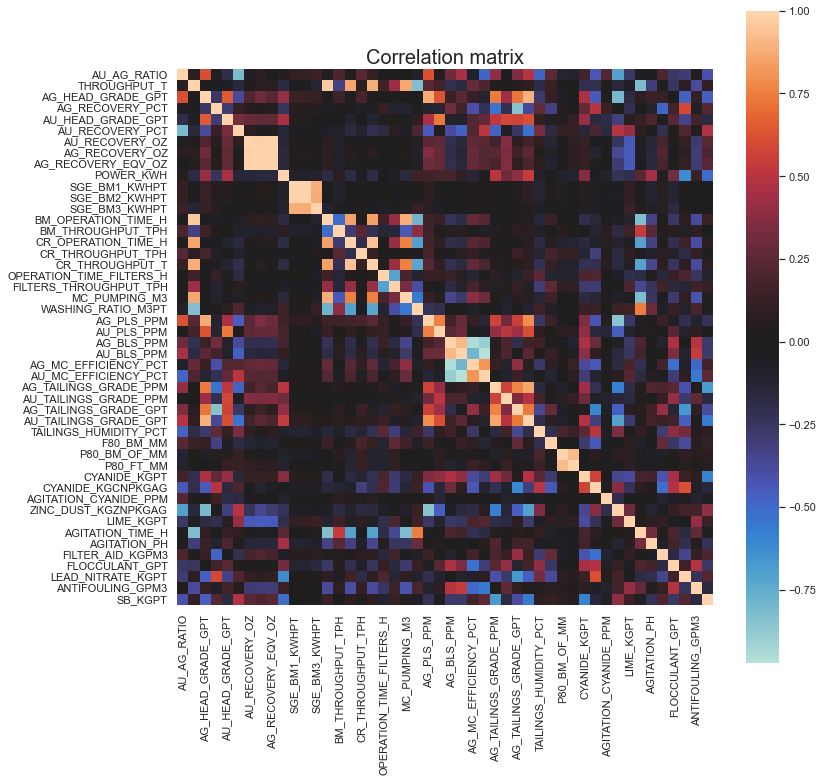

In [206]:
# Correlation analysis
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12,12))
# Heatmap 
print("This is the heatmap of all variables")
all_corr = sns.heatmap(corr_matrix,vmax=1,square=True,center=0)
plt.title("Correlation matrix",size=20)
plt.show(block=False)
plt.show()

The following heatmap shows the strongest correlations with AG_RECOVERY_PCT


,Variable,r,p-Value
2,FILTER_AID_KGPM3,-0.483,0.000
3,AG_MC_EFFICIENCY_PCT,-0.401,0.000
5,F80_BM_MM,-0.318,0.000
8,POWER_KWH,-0.242,0.001
9,AU_MC_EFFICIENCY_PCT,-0.222,0.003
11,LIME_KGPT,-0.208,0.005
41,SB_KGPT,0.227,0.002
42,TAILINGS_HUMIDITY_PCT,0.264,0.000
43,CYANIDE_KGPT,0.268,0.000
45,CYANIDE_KGCNPKGAG,0.495,0.000


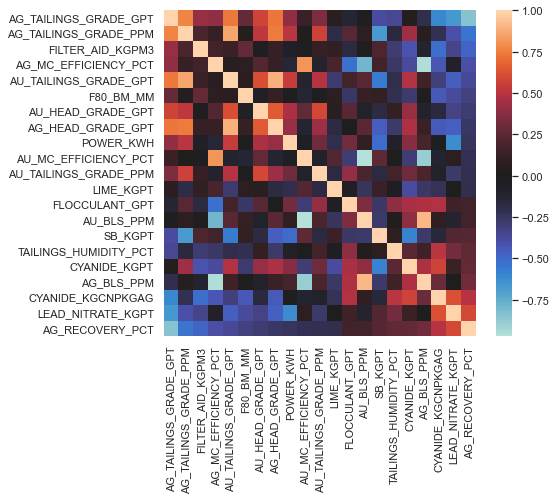

In [207]:
# The Definitive Paired Crrelation Table with p-Value and Heatmap

# Calculate correlation matrix of original dataframe
dfcorr = df.corr()

# Select main variable and k for n interest correlations
y = rag # because we declared it be4
k = 20 #because we declared it be4

# Create a data frame of n largest POSITIVE correlations
s = dfcorr.unstack()
sp = s.sort_values(kind="quicksort")
spn = pd.DataFrame(sp[y])

# Concatenate data frames to create a table
frames = [spn]
xcorr =  round(pd.concat(frames),3)

# Significance of Correlations
x = xcorr.index
pval = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x,y)[1]) - np.eye(*pval.shape)
pval = round((pval).unstack(),3)
pval = pval.sort_values(kind="quicksort")
pval = pval[y]
pval = pd.DataFrame(pval)
pval = pval.T
pval = pval[x].T

#Create a data frame that contains variable names using positive and negative correlations table
corrsig = pd.DataFrame(xcorr.index)

# Reset indexes of correlation and p value tables (dataframes)
xcorr.reset_index(inplace=True, drop=True)
pval.reset_index(inplace=True, drop=True)

# Concatenate tables
pairs = pd.DataFrame(pd.concat([corrsig,xcorr,pval],axis=1))
pairs.drop_duplicates()

# Rename column names
pairs = pairs.set_axis(['Variable', 'r', 'p-Value'], axis=1, inplace=False)

# Print table and heatmap
print("The following heatmap shows the strongest correlations with", y)
pVal = pairs[pairs['p-Value'] < 0.05]
rVal =  pVal[pVal['r'] < -0.1]
rVal = rVal.drop_duplicates()
qVal =  pVal[pVal['r'] > 0.1]
qVal = qVal.drop_duplicates()

#pd.concat([rVal,qVal],axis=0)
rtable = pd.concat([rVal,qVal],axis=0)

# Heatmap of higher correlations
#Create a list of higher positive and negative correlations to create a dataframe that contains these variables
corr_list = rtable['Variable'].tolist()
d = df[corr_list]

# Calculate correlation matrix and create heatmap
dcorr = d.corr()
f, ax = plt.subplots(figsize=(7,6))
#heat = sns.heatmap(dcorr,vmax=1,square=True,center=0)
heat = sns.heatmap(dcorr,vmax=1,square=False,center=0)

# Exclude correlated variables that contain 'Ag ' (lrtable for linear regression table).
# lrtable Variable values are ment to be used in a linear regression
# Note the use of '~' that is the 'ivert operator'

urltable = rtable[~rtable.Variable.str.contains("_GPT","_PPM")] 
lrtable = urltable[~rtable.Variable.str.contains("_PPM")]
lrtable



In [208]:
# Paired Crrelation Table with p-Value

# Calculate correlation matrix of original dataframe
dfcorr = df.corr()
s = dfcorr.unstack()
sp = s.sort_values(kind="quicksort")
spn = pd.DataFrame(sp[y])

# Concatenate data frames to create a table
frames = [spn]
xcorr =  round(pd.concat(frames),3)

# Significance of Correlations
x = xcorr.index
pval = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x,y)[1]) - np.eye(*pval.shape)
pval = round((pval).unstack(),3)
pval = pval.sort_values(kind="quicksort")
pval = pval[y]
pval = pd.DataFrame(pval)
pval = pval.T
pval = pval[x].T

# Create a data frame that contains variable names using positive and negative correlations table
corrsig = pd.DataFrame(xcorr.index)

# Reset indexes of correlation and p value tables (dataframes)
xcorr.reset_index(inplace=True, drop=True)
pval.reset_index(inplace=True, drop=True)

# Concatenate tables
pairs = pd.DataFrame(pd.concat([corrsig,xcorr,pval],axis=1))
pairs.drop_duplicates()

# Rename column names
pairs = pairs.set_axis(['Variable', 'r', 'p-Value'], axis=1, inplace=False)

# Higher and lower correlations dataframe
pVal = pairs[pairs['p-Value'] < 0.05]
rVal =  pVal[pVal['r'] < -0.1]
rVal = rVal.drop_duplicates()
qVal =  pVal[pVal['r'] > 0.1]
qVal = qVal.drop_duplicates()

rtable = pd.concat([rVal,qVal],axis=0)

# Exclude correlated variables that contain 'Ag ' (lrtable for linear regression table).
# lrtable 'Variable' values are ment to be used in subsequent analysis
# Note the use of '~' that is the 'invert operator'

xcorr_table = rtable[~rtable.Variable.str.contains("_PPM")]
corr_table = xcorr_table[~rtable.Variable.str.contains("_GPT")]
corr_vars = corr_table['Variable'].to_list() # List of most correlated variables

# Identify strongest correlation variable and print correlation table
jfc = corr_table['Variable'].loc[corr_table['p-Value'] == corr_table['p-Value'].min(),].values[0]
abrb = corr_table['r'].loc[corr_table['Variable'] == jfc].values[0]
aild = corr_table['p-Value'].loc[corr_table['Variable'] == jfc].values[0]

print("Strongest (statistically significant) positive and negative correlations with", y,
    "are shown in the next table: \n",corr_table,
    "\n \n The variable with the stongest correlation with", y,"is",jfc,"with a correlation value of",
    abrb, "and a p-Value equal to",aild,"\n")

if abrb + abs(abrb) == 0:
    print(jfc, "correlation with", y,"is negative i.e. when",jfc,"values increase",y,"decreases.")
else: 
    print(jfc, "correlation with", y,"is positive i.e. when",jfc,"values increase",y,"rise.")

Strongest (statistically significant) positive and negative correlations with AG_RECOVERY_PCT are shown in the next table: 
                  Variable      r  p-Value
2        FILTER_AID_KGPM3 -0.483    0.000
3    AG_MC_EFFICIENCY_PCT -0.401    0.000
5               F80_BM_MM -0.318    0.000
8               POWER_KWH -0.242    0.001
9    AU_MC_EFFICIENCY_PCT -0.222    0.003
11              LIME_KGPT -0.208    0.005
41                SB_KGPT  0.227    0.002
42  TAILINGS_HUMIDITY_PCT  0.264    0.000
43           CYANIDE_KGPT  0.268    0.000
45      CYANIDE_KGCNPKGAG  0.495    0.000
46      LEAD_NITRATE_KGPT  0.595    0.000
47        AG_RECOVERY_PCT  1.000    0.000 
 
 The variable with the stongest correlation with AG_RECOVERY_PCT is FILTER_AID_KGPM3 with a correlation value of -0.483 and a p-Value equal to 0.0 

FILTER_AID_KGPM3 correlation with AG_RECOVERY_PCT is negative i.e. when FILTER_AID_KGPM3 values increase AG_RECOVERY_PCT decreases.


ValueError: cannot reindex on an axis with duplicate labels

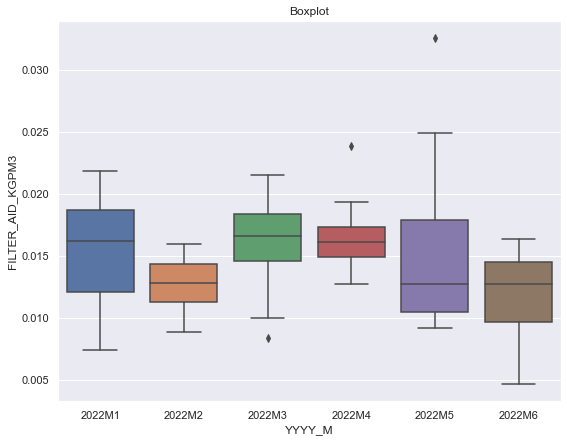

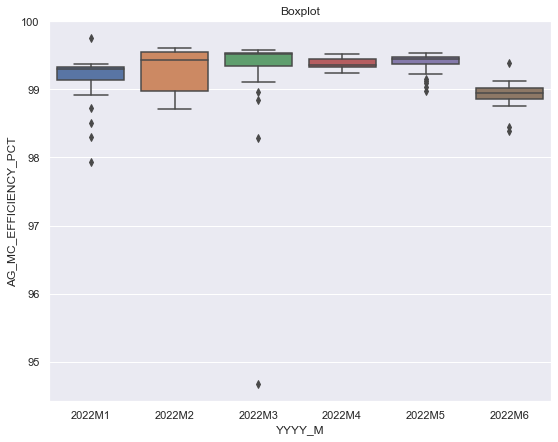

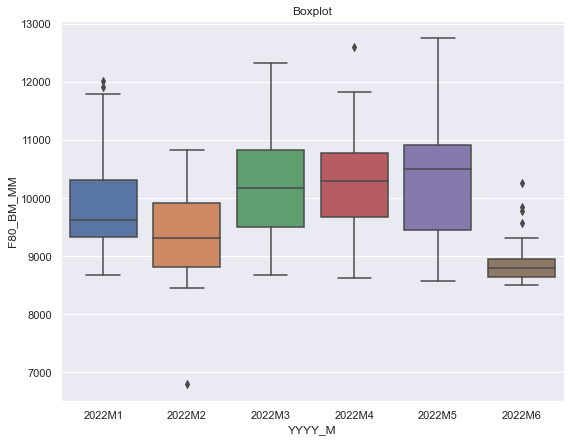

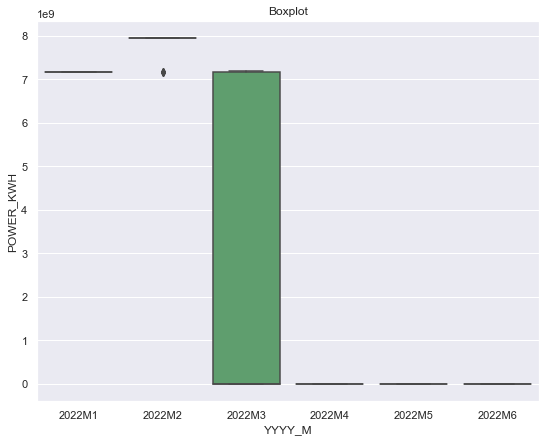

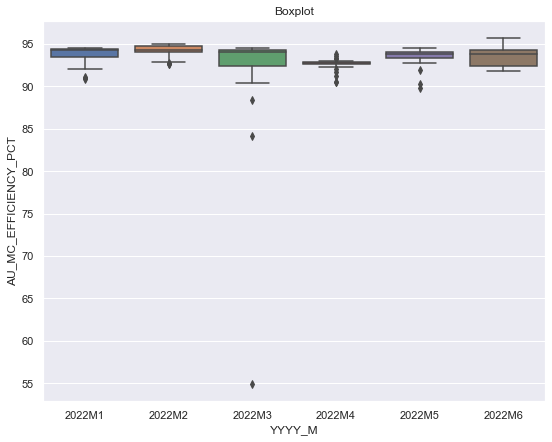

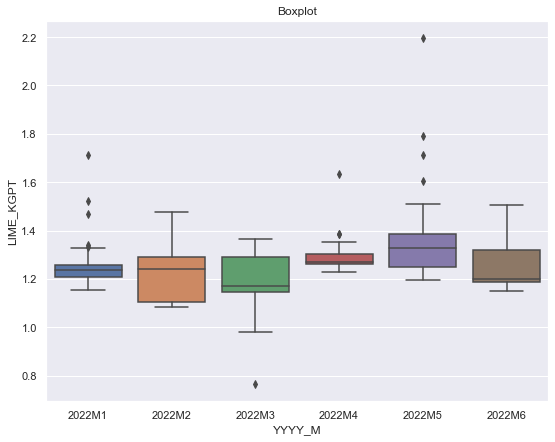

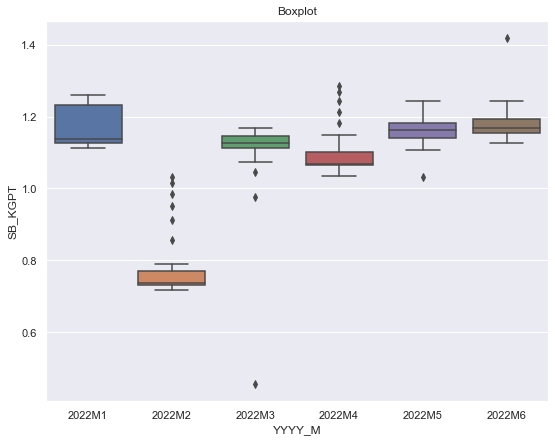

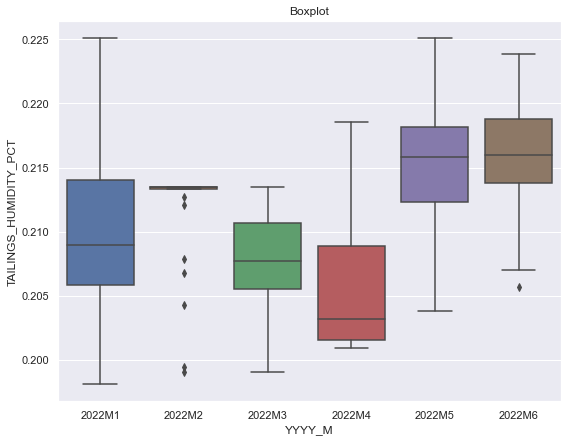

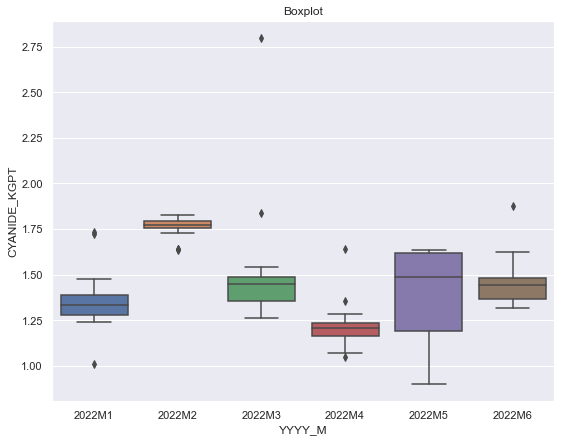

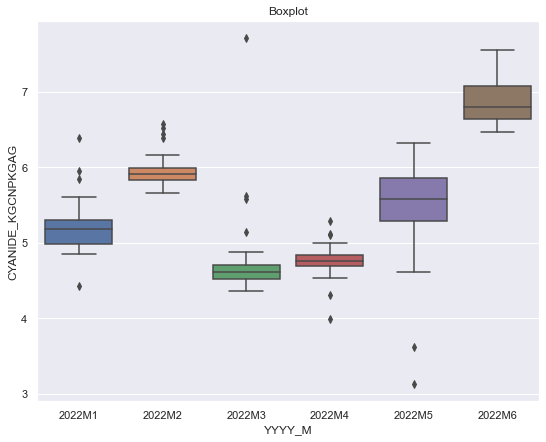

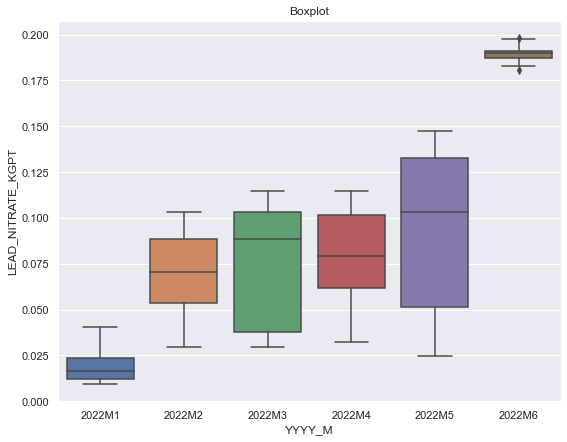

In [209]:
# Boxplot of the x variables correlated with response variable
df = df_k.copy()
var = 0
corr_vars.append(y)
x = corr_vars[var]

for x in corr_vars:
    # Person correlation coef and sig. 
    d = df[corr_vars]
    # In case of hue need.
    d['YYYY_M'] = data['YYYY_M']
    h = 'YYYY_M'
    #d['year'] = data['year']
    #d['quarter'] = data['quarter']
    
    #Eliminar filas con algún valor 0
    d= d[d[x] != 00]
       
    #Crear gráfica
    sns.set(rc={'figure.figsize':(9,7)})
    plt.figure()
    sns.boxplot(data=d,x=h, y=x)
    #sns.scatterplot(data=d,x=x, y=y, hue="year")
    #sns.lmplot(data=d,x=x, y=y,hue="year")
    plt.title("Boxplot")
    var = var + 1

In [ ]:

# Scatterplot and correlation x variables vs. y variable
df = df
var = 0
y = dag
x = corr_table['Variable'].to_list()

for x in corr_vars:
    # Person correlation coef and sig. 
    d = pd.concat([df[x],df[y]],axis=1)
    #print("Correlation and p-Value are:",pearsonr(d[x],d[y])) # Print corr and sig for each scatterplot
    
    # In case of hue need.
    #d['ym'] = data['ym']
    #d['year'] = data['year']
    #d['quarter'] = data['quarter']
    
    # Delete rows with oversize or 0
    d= d[d[x] != 00]
    d= d[d[y] < 100]
    
    #Crear gráfica
    sns.set(rc={'figure.figsize':(7,7)})
    plt.figure()
    sns.regplot(data=d,x=x, y=y)
    #sns.scatterplot(data=d,x=x, y=y, hue="year")
    #sns.lmplot(data=d,x=x, y=y,hue="year")
    title = y,"vs.",x
    plt.title(str(title))
    plt.ylabel(y)
    plt.xlabel(x)
    
    var = var + 1



In [210]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings

In [ ]:
#pd.DataFrame(df.mean(axis=0))

,0
AU_AG_RATIO,9.419559e+01
THROUGHPUT_T,2.199292e+03
AG_HEAD_GRADE_GPT,2.833143e+02
AG_RECOVERY_PCT,9.315525e+01
AU_HEAD_GRADE_GPT,3.015790e+00
AU_RECOVERY_PCT,9.587850e+01
AU_RECOVERY_OZ,3.195083e+03
AG_RECOVERY_OZ,2.915204e+05
AG_RECOVERY_EQV_OZ,5.480846e+05
POWER_KWH,2.990791e+09


### PCA

In [212]:
# Necessary libraries for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import miceforest as mf
import scipy.stats as stats
import statsmodels.api as sm   


# Principal Component Analysis
#==================================================================

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


# Factorial Analysis
#==================================================================

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


# Test and train split
#==================================================================

from sklearn.model_selection import train_test_split


# Warnings settings
#=================================================================
import warnings
warnings.filterwarnings("ignore") 


In [240]:
df = df_k

In [241]:
p_vars = df.shape[1] # Numero de variables del set de datos
pca_model = PCA(n_components = p_vars) 

In [217]:
range_pca = range(0,p_vars)
 
list_pca = list()
for x in range_pca :
    list_pca.append(x)



In [242]:
# Crear lista de etiquetas de componentes principales

princomp = pd.DataFrame(index=[list(range(0,p_vars))])
princomp['P_C'] = "PC"
princomp['P_n'] = list(range(1,p_vars+1))
princomp['num'] = princomp['P_n'].astype(str)
princomp['P_C_N'] = princomp['P_C'].str.cat(princomp['num'],sep="") 
P_C_N= princomp['P_C_N'].to_list()


In [243]:
# Escalamiento de los datos

scaler = StandardScaler()
dfk_s = scaler.fit(df) # Recordemos que dfk es el datframe de valores numéricas al cuál se le han imputado los valores perdidos
dfk_s = scaler.transform(df)

In [244]:
# Perform PCA

pca_model.fit(dfk_s) 

PCA(n_components=48)

In [245]:
# Ver las cargas de cada componente principal ordenadas para observar su influencia en cada pc

prince_of_persia = pd.DataFrame(
    data    = pca_model.components_,
    columns = df.columns,
    index   = P_C_N
)
pop = pd.DataFrame(prince_of_persia.T)
#pop['PC1'].sort_values(kind="quicksort")
pop

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48
AU_AG_RATIO,0.213346,0.013363,0.115470,0.203539,0.252803,-0.117929,-0.122588,0.114036,0.018088,0.074190,...,0.082275,-0.421047,0.069966,0.275777,-0.116433,0.436525,0.102734,-0.007533,0.147108,-0.136577
THROUGHPUT_T,0.044565,-0.305727,0.177310,0.028036,-0.096670,0.028249,0.027627,0.051737,-0.026666,-0.058512,...,0.121189,0.043044,-0.071809,0.051846,0.033958,0.000592,-0.009008,-0.017621,0.006007,-0.019843
AG_HEAD_GRADE_GPT,0.326904,0.030249,-0.028234,-0.017807,0.039118,0.040813,0.014246,0.097942,-0.138766,-0.020982,...,0.041795,0.074247,-0.102029,-0.153812,-0.299369,-0.314792,-0.405444,0.408793,0.191031,0.182064
AG_RECOVERY_PCT,-0.148308,0.062491,0.230022,-0.140497,0.169684,-0.021488,-0.010654,0.159841,-0.283884,0.041470,...,0.066648,-0.057037,-0.192831,0.022263,0.465612,-0.008488,-0.058714,-0.021585,-0.034657,-0.032180
AU_HEAD_GRADE_GPT,0.199329,0.032251,-0.150312,-0.200062,-0.204863,0.147228,0.160474,0.020778,-0.183889,-0.085389,...,0.151774,-0.306880,0.202374,0.368715,-0.146271,-0.037731,-0.013294,-0.264283,-0.355967,0.003683
AU_RECOVERY_PCT,-0.186673,-0.010011,-0.198184,-0.173099,-0.152788,0.088407,0.162671,0.010464,-0.243766,-0.093667,...,-0.058290,0.168777,-0.181067,-0.064198,-0.097248,0.215505,0.334639,0.033850,0.243163,-0.147818
AU_RECOVERY_OZ,0.087241,-0.069335,-0.062557,-0.354616,0.163458,-0.217694,0.072193,-0.136844,0.054061,0.084311,...,0.183791,-0.296642,0.092289,-0.420476,0.000213,0.096706,0.216703,-0.061073,0.073533,0.486805
AG_RECOVERY_OZ,0.118289,-0.082275,-0.055515,-0.325181,0.197501,-0.224689,0.045159,-0.115316,0.038147,0.073252,...,-0.218086,0.306808,-0.228090,0.581007,0.040974,0.001256,-0.077297,-0.063432,0.074609,0.259314
AG_RECOVERY_EQV_OZ,0.097331,-0.075389,-0.055633,-0.346243,0.179987,-0.220694,0.059790,-0.126242,0.046870,0.078423,...,0.025372,-0.007957,0.123822,-0.148087,-0.029476,-0.106142,-0.139714,0.123673,-0.142433,-0.746998
POWER_KWH,0.162624,0.122359,-0.041380,0.021769,-0.229577,0.157855,-0.122317,-0.093375,0.033292,0.152092,...,-0.017129,0.007360,-0.018271,0.040971,-0.015290,0.008743,-0.018010,0.007971,0.006201,-0.005369


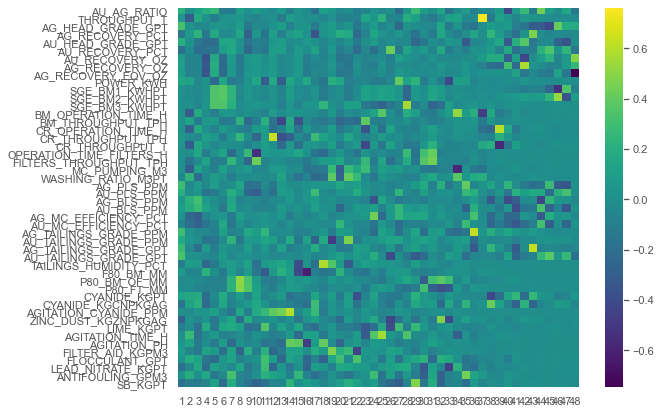

In [224]:
# Heatmap de componentes principales

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 7))
components = pca_model.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(pca_model.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Cummulative Explainef Variance
[0.17158037 0.33398986 0.43512416 0.52739846 0.59540162 0.65340475
 0.709882   0.75199447 0.78455862 0.81627447 0.83915264 0.85891607
 0.87736743 0.89542527 0.91102162 0.9250103  0.93472266 0.94365079
 0.9520412  0.95975783 0.96637151 0.97251449 0.97712884 0.9807781
 0.9840385  0.98684345 0.98918098 0.99133166 0.99318133 0.99479991
 0.99616809 0.99719014 0.99798059 0.9986193  0.99918104 0.99958609
 0.99975682 0.99983446 0.99989103 0.99993945 0.99996078 0.9999782
 0.99998766 0.99999199 0.99999518 0.99999732 0.99999921 1.        ]

 Se observa que con 8 componentes se logra cumplir con el 75% de varianza explicada, que es el mínimo aceptable, y son necesarios 30 componentes para cubrir el 100% de la variación explicada


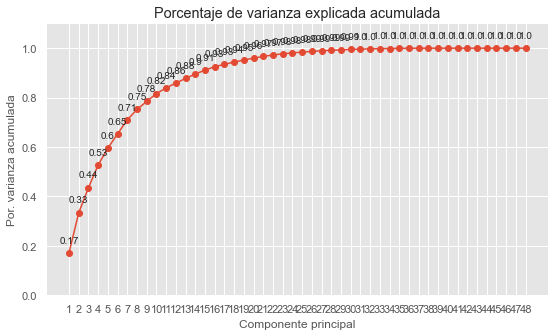

In [229]:
# Porcentaje de varianza explicada acumulada

# Porcentaje de varianza explicada
s_cum_prop = pca_model.explained_variance_ratio_.cumsum()

print('Cummulative Explainef Variance')
print(s_cum_prop)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
ax.plot(
    np.arange(len(df.columns)) + 1,
    s_cum_prop,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, s_cum_prop):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_model.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

print("\n Se observa que con 8 componentes se logra cumplir con el 75% de varianza explicada, que es el",
    "mínimo aceptable, y son necesarios 30 componentes para cubrir el 100% de la variación explicada")

In [230]:
# Definir el número de Componentes principales

s_change =  0.05 # Cambio mínimo en la vairanza acumulada para definir nro de componentes
s_explained = 0.85 # Mínimo de varianza explicada Aceptable = (85%, 95%), Mínimo = 75%
s_cum = round(pd.DataFrame(s_cum_prop),2) #df de la varianza acumulada
s_cum.set_axis(['S'],axis=1,inplace=True) # Renombrar columna

s_cum = s_cum[s_cum['S'] > s_explained] # Filtrar los casos con variación explicada mayor a 0.85
n_comp = s_cum.index[:1].values # Obtener el índice 
n_comp = n_comp[0] # El índice es igual a el número de componentes a utilizar

print("Siguiendo el pricipio de reducir el máximo posible de dimensiones o de información se ha utilizado el 85% de varianza explicada acumulada, que es considerado aceptable, como criterio para elegir el número de componentes a utilizar, siendo este", n_comp)

Siguiendo el pricipio de reducir el máximo posible de dimensiones o de información se ha utilizado el 85% de varianza explicada acumulada, que es considerado aceptable, como criterio para elegir el número de componentes a utilizar, siendo este 11


In [232]:
# Proyecciones

projections = np.dot(pca_model.components_, scale(df).T)
projections = pd.DataFrame(projections, index = P_C_N)
projections = projections.transpose().set_index(df.index)
projections.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48
0,-3.881316,-1.254170,-2.024336,3.045455,-1.433629,1.225081,-0.623460,-0.392540,-0.290493,-1.413123,...,-0.021359,0.026078,-0.040247,0.117024,0.053312,-0.040827,0.029202,-0.016439,-0.009645,-0.010679
1,-4.086725,5.741510,0.067571,1.263013,0.087892,1.107521,-1.221558,-1.440543,0.988014,-2.236936,...,-0.055165,0.184208,0.109732,-0.015251,0.031395,0.032091,0.001595,-0.027461,-0.022832,-0.006192
2,-3.919086,12.056228,-4.561929,1.515494,1.149282,0.129138,-1.490126,1.955706,-3.536279,-1.422613,...,0.109648,-0.000823,-0.009393,-0.018878,-0.016972,-0.006028,0.003409,0.003492,-0.001382,-0.000121


In [272]:
# Crear el set de datos definitivo
# Número y lista de componentes a utilizar
P_C_N = princomp['P_C_N']
P_C_N = P_C_N[0:n_comp].to_list()
#P_C_N

df_pc = projections[P_C_N]
df_date = data[['DATE','MONTH']]
df_pc = pd.concat([df_date,df_pc],axis=1)
df_pc.to_csv(r"dataset_pca.csv")
df_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-3.881316,-1.254170,-2.024336,3.045455,-1.433629,1.225081,-0.623460,-0.392540,-0.290493,-1.413123,-2.583635
1,-4.086725,5.741510,0.067571,1.263013,0.087892,1.107521,-1.221558,-1.440543,0.988014,-2.236936,-2.649257
2,-3.919086,12.056228,-4.561929,1.515494,1.149282,0.129138,-1.490126,1.955706,-3.536279,-1.422613,0.390613
3,-3.549477,5.600248,0.028211,1.404433,-0.943440,0.939124,0.405925,-0.179206,-2.577368,0.338117,0.008843
4,-2.995295,0.552212,1.878501,1.576218,-1.544397,0.709929,0.736339,-0.104646,-1.260057,0.855494,-1.444189
...,...,...,...,...,...,...,...,...,...,...,...
176,-4.274491,1.126338,1.760864,-2.263325,0.519207,-0.006790,-0.760762,-1.350887,0.766727,0.899881,0.499080
177,-4.356855,1.329043,1.599419,-2.613377,0.577132,-0.217461,-0.326524,-1.125723,1.080528,0.964301,0.313553
178,-4.018186,-0.150106,2.529888,-2.267248,0.825866,-0.324772,-0.133112,-1.843005,0.385146,0.917028,0.913102
179,-4.065489,0.448832,2.138392,-2.513587,0.966883,-0.711520,-0.090938,-0.940705,0.637500,0.734248,1.334562


### K Means


In [249]:
from sklearn import cluster, datasets, metrics
import numpy as np
import matplotlib.pyplot as plt

In [273]:
X = df_pc.values

In [275]:
df_pc.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11'],
      dtype='object')

In [298]:
df_sns = df_k[corr_list]

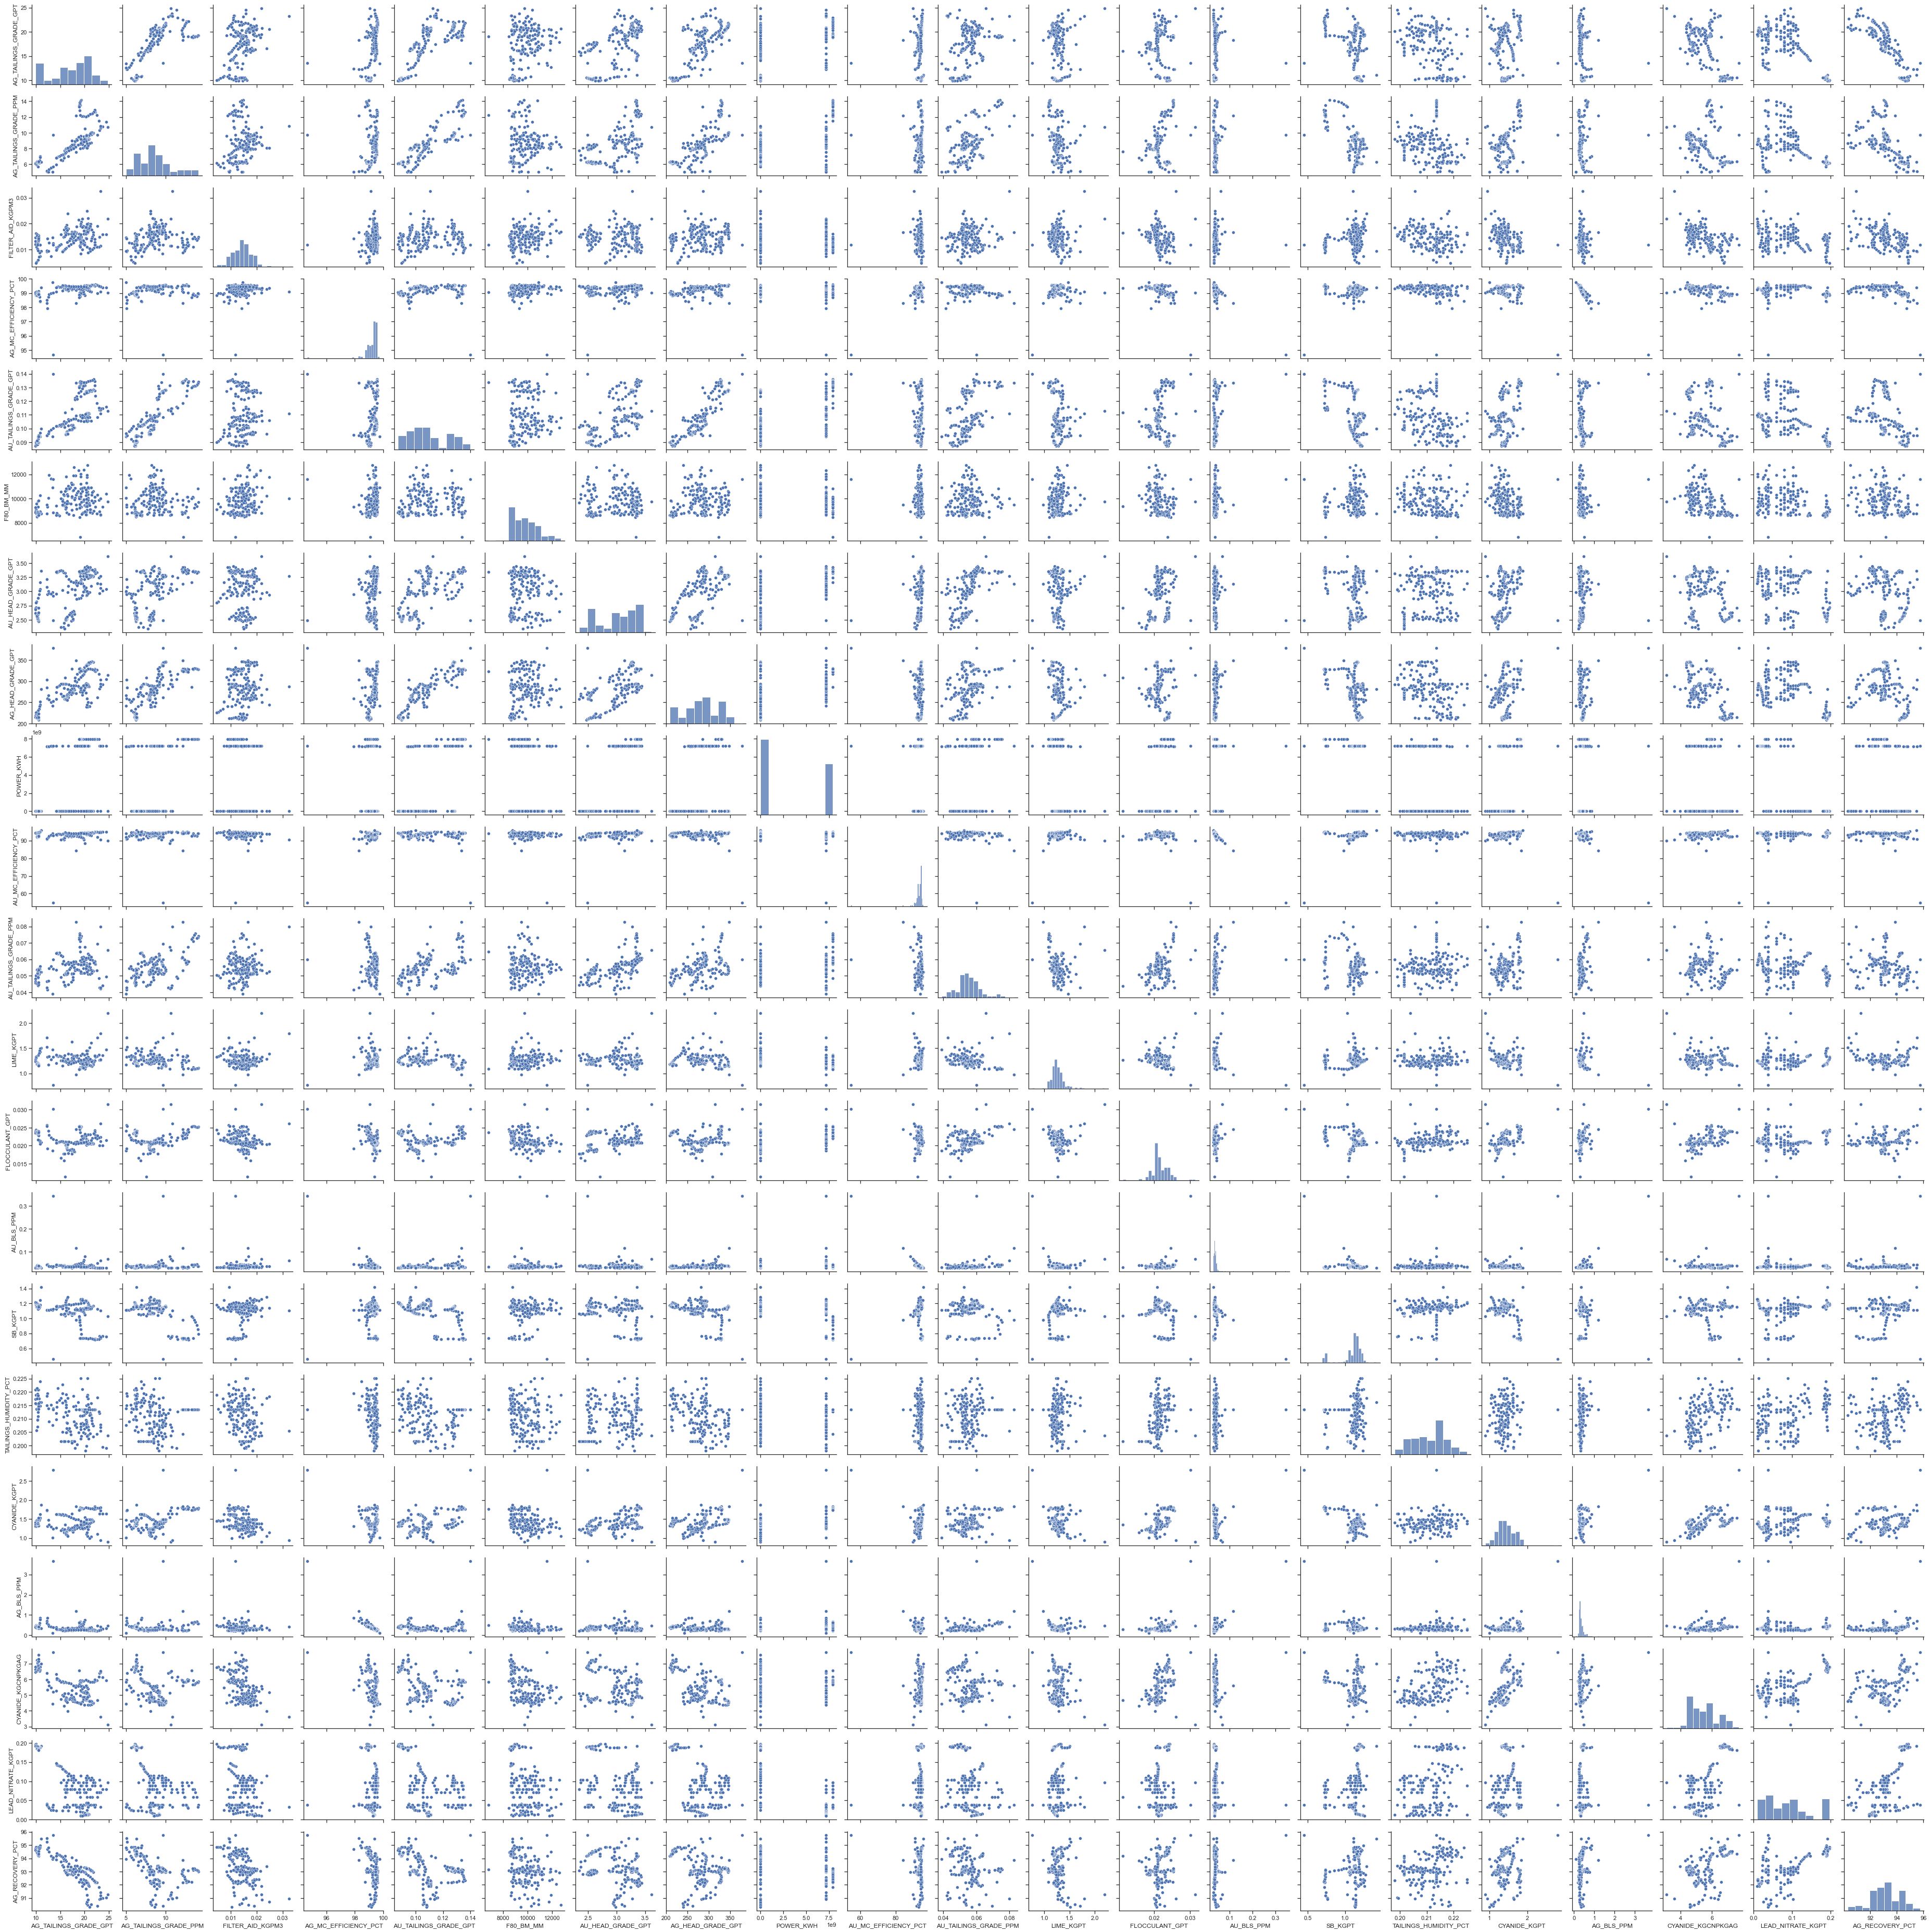

In [300]:
import seaborn as sns
sns.pairplot(df_sns)

In [286]:
import plotly.express as px
fig = px.scatter_matrix(df_pc)
fig.show()

In [293]:
y_preds = []
results = {}
k = 7
for k in range(2, int(np.sqrt(len(X)))):
  k_means = cluster.KMeans(n_clusters=12).fit(X)
  y_pred = k_means.predict(X)
  y_preds.append(y_pred)
  results[k] = metrics.silhouette_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Silhouette')

ax1.scatter(X[:, 0], X[:, 1], c=y_preds[1])
ax1.set_xlabel(df_pc.columns[0])
ax1.set_ylabel(df_pc.columns[1])

plt.show()

NameError: name 'plot' is not defined